<a href="https://colab.research.google.com/github/tomcat472/geopandas_myanmar/blob/main/geopandas_2023_part01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# geopandas မှာ အဓိက data structures ၂ မျိုးရှိပါတယ်။
# သူတို့က GeoSeries နဲ့ GeoDataFrame တို့ဖြစ်ပါတယ်။
# GeoSeries ဟာ တကယ်က vector data တွေပါတဲ့ entry တစ်ခုဖြစ်ပါတယ်။
# သူ့ဆီမှာ shape တွေ တစ်ခုအထက်ပါဝင်နိုင်ပါတယ်။
# Geopandas မှာ three basic classes of geometric objects တွေရှိပါတယ်။
# သူတို့ကတော့ 1) Points/Multi-Points 2) Lines/Multi-Lines နဲ့ Polygons/ Multipolygons တို့ဖြစ်ပါတယ်။
# တစ်ခုမှတ်ထားရမှာက GeoSeries မှာပါတဲ့ entries တွေဟာ same geometric type ဖြစ်စရာမလိုပါဘူး။
# GeoSeries တစ်ခုမှာ shapely ရဲ့ Attributes တွေနဲ့ Methods တွေပါဝင်ပါတယ်။
# GeoDataFrame ကတော့ GeoSeries တွေပါဝင်တဲ့ tabular data structure ဖြစ်ပါတယ်။

In [2]:
# geopandas ကို စသုံးဖို့အတွက် import ပြုလုပ်ရပါမယ်။
import geopandas as gpd

In [3]:
# geodatasets library ထဲက dataset တွေကို သုံးဖို့အတွက်
# သူ့ကို pip နဲ့အရင် install တင်ပေးရပါမယ်။
# pip install geodatasets

In [4]:
# install တင်ပြီးတာနဲ့ import ပြုလုပ်ပေးရပါမယ်။
import geodatasets

In [5]:
colombia=gpd.read_file(geodatasets.get_path('geoda.malaria'))
colombia.head()

,ID,ADM0,ADM1,ADM2,CODDEPT,IDDANE,DANECODE,TP1973,UP1973,RP1973,...,TP2003,UP2003,RP2003,TP2004,UP2004,RP2004,TP2005,UP2005,RP2005,geometry
0,1,COLOMBIA,Guajira,URIBIA,44,44847,44847,57815,2881,54934,...,67709,6682,61027,68458,7053,61405,69203,7430,61773,"POLYGON ((-71.32639 11.84789, -71.33579 11.855..."
1,2,COLOMBIA,Guajira,MANAURE,44,44560,44560,5661,4074,1587,...,42371,8548,33823,44229,9096,35133,46134,9669,36465,"POLYGON ((-72.42191 11.79824, -72.41980 11.795..."
2,3,COLOMBIA,Guajira,MAICAO,44,44430,44430,36771,25161,11610,...,140121,122435,17686,144277,126249,18028,148517,130149,18368,"POLYGON ((-72.18910 11.52420, -72.18330 11.532..."
3,4,COLOMBIA,Guajira,RIOHACHA,44,44001,44001,46024,22545,23479,...,98318,90883,7435,98909,91408,7501,99472,91906,7566,"POLYGON ((-72.63800 11.36790, -72.62590 11.349..."
4,5,COLOMBIA,Magdalena,SITIONUEVO,47,47745,47745,16493,6289,10204,...,21058,11646,9412,21101,11723,9378,21143,11800,9343,"POLYGON ((-74.77489 10.93158, -74.77530 10.933..."


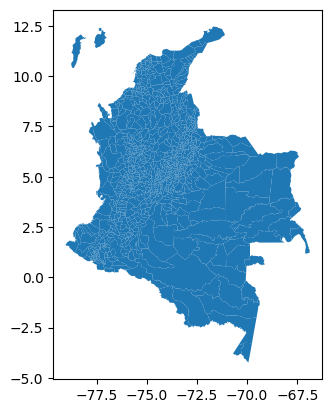

In [6]:
# plot ပြုလုပ်ခြင်ူ
colombia.plot(markersize=.5);

In [7]:
# အပေါ်က ပုံကို ဆွဲဖို့အတွက် geometry ဆိုတဲ့ column က မဖြစ်မနေလိုအပ်ပါတယ်။
colombia.geometry.head()

0    POLYGON ((-71.32639 11.84789, -71.33579 11.855...
1    POLYGON ((-72.42191 11.79824, -72.41980 11.795...
2    POLYGON ((-72.18910 11.52420, -72.18330 11.532...
3    POLYGON ((-72.63800 11.36790, -72.62590 11.349...
4    POLYGON ((-74.77489 10.93158, -74.77530 10.933...
Name: geometry, dtype: geometry

In [8]:
# တခါတလေမှာ ကိုယ်က ပုံတပုံပြုလုပ်တဲ့အခါ geometry column ကိုလိုချင်တဲ့အခါ ဒီအတိုင်းရှာလို့ရပါတယ်။
colombia.geometry.name

'geometry'

In [9]:
# geometry column ကို နာမည်ပြောင်းလို့လဲရပါတယ်။
colombia=colombia.rename_geometry('borders')
colombia.geometry.name

'borders'

<ipython-input-10-c9004fd6ac4f>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  colombia['centroid_column']=colombia.centroid


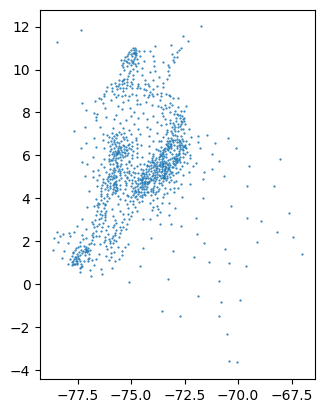

In [10]:
# polygon တွေရဲ့ center အားရှာခြင်း
colombia['centroid_column']=colombia.centroid
colombia=colombia.set_geometry('centroid_column')
colombia.plot(markersize=.3);

In [11]:
gpd.options

Options(
  display_precision: None [default: None]
      The precision (maximum number of decimals) of the coordinates in the
      WKT representation in the Series/DataFrame display. By default (None),
      it tries to infer and use 3 decimals for projected coordinates and 5
      decimals for geographic coordinates.
  use_pygeos: False [default: False]
      Whether to use PyGEOS to speed up spatial operations. The default is
      True if PyGEOS is installed, and follows the USE_PYGEOS environment
      variable if set.
  )

In [12]:
# display_percision နဲ့ ကိုယ်မြင်ချင်တဲ့ ဒဿမတန်ဖိုးတွေကို သတ်မှတ်လို့ရပါတယ်။
gpd.options.display_precision = 9
colombia.centroid_column.head()

0    POINT (-71.745940217 12.008854228)
1    POINT (-72.565144214 11.581744777)
2    POINT (-72.352030378 11.322036612)
3    POINT (-73.141207300 11.152507044)
4    POINT (-74.645551117 10.884543716)
Name: centroid_column, dtype: geometry